In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline

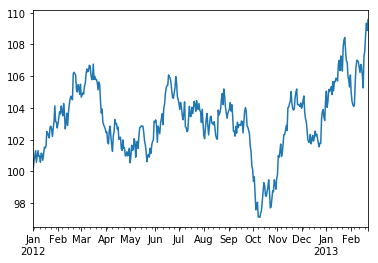

In [4]:
def geometric_brownian_motion(T = 1, N = 100, mu = 0.1, sigma = 0.1, S0 = 20):   
    """
    dS=μS dt+σS dWt
    t = time
    n = no periods
    mu = drift
    sigma = stand dev
    w = standard brownian motion 
    S = geom standard brownian motion 
    s0 = start price
    """     
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W ### ITO'S LEMMA
    S = S0*np.exp(X) ### geometric brownian motion ###
    return S
dates = pd.date_range('2012-01-01', '2013-02-22')
T = (dates.max()-dates.min()).days / 365
N = dates.size
start_price = 100
y = pd.Series(
    geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)

y.plot()

Text(0.5, 1.0, 'Brownian Increments')

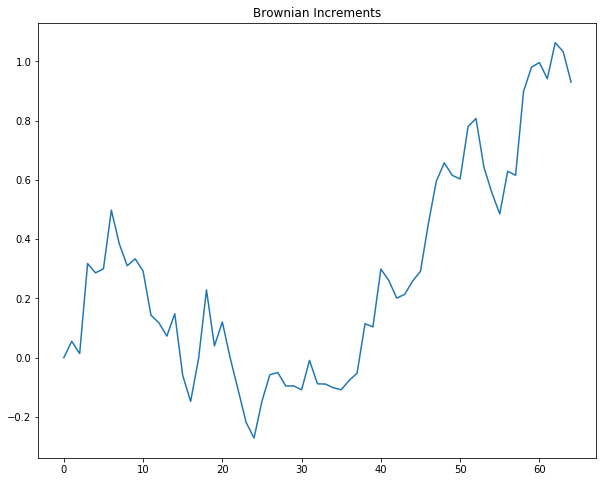

In [5]:
seed = 5       
N  = 2.**6     # increments

def Brownian(seed, N):
    
    np.random.seed(seed)                         
    dt = 1./N                                    # time step
    b = np.random.normal(0., 1., int(N))*np.sqrt(dt)  # brownian increments
    W = np.cumsum(b)                             # brownian path
    return W, b


# brownian increments
b = Brownian(seed, N)[1]

# brownian motion
W = Brownian(seed, N)[0]
W = np.insert(W, 0, 0.)                      

plt.rcParams['figure.figsize'] = (10,8)
xb = np.linspace(1, len(b), len(b))
plt.plot(W)
plt.title('Brownian Increments')

In [6]:
import dfconvert
#quandl.ApiConfig.api_key = "wDWwy32n6Sm4jg96yHPK"
#
#start = "2016-01-01"
#end = "2016-12-31"
#
#df = quandl.get("WIKI/AMZN", start_date = start, end_date = end)
df = dfconvert.df_store('quanddata').load_df()
df.head()

Ipython active
Loading pickle: data\quanddata...
dataframe loaded successfully


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-01-04,656.29,657.715,627.51,636.99,9314519.0,0.0,1.0,656.29,657.715,627.51,636.99,9314519.0
2016-01-05,646.86,646.910,627.65,633.79,5822603.0,0.0,1.0,646.86,646.910,627.65,633.79,5822603.0
2016-01-06,622.00,639.790,620.31,632.65,5329197.0,0.0,1.0,622.00,639.790,620.31,632.65,5329197.0
2016-01-07,621.80,630.000,605.21,607.94,7074915.0,0.0,1.0,621.80,630.000,605.21,607.94,7074915.0
2016-01-08,619.66,624.140,606.00,607.05,5512915.0,0.0,1.0,619.66,624.140,606.00,607.05,5512915.0


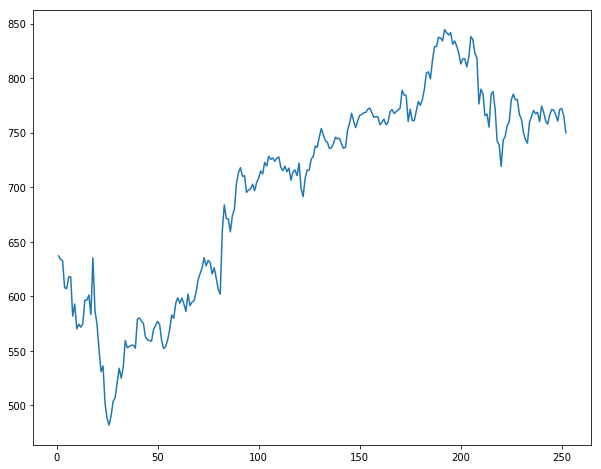

In [7]:
adj_close = df['Adj. Close']
time = np.linspace(1, len(adj_close), len(adj_close))

plt.plot(time, adj_close)
plt.show()


In [8]:
def daily_return(adj_close):
    returns = []
    for i in range(0, len(adj_close)-1):
        today = adj_close[i+1]
        yesterday = adj_close[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns

returns = daily_return(adj_close)

mu = np.mean(returns)*252.           # drift coefficient
sig = np.std(returns)*np.sqrt(252.)  # diffusion coefficient

print(mu, sig)

0.20610164414801632 0.29123424927038993


Text(0.5, 1.0, 'Geometric Brownian Motion - AMZN')

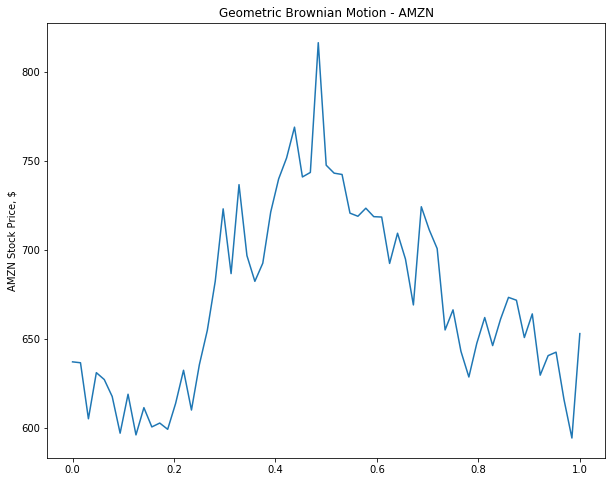

In [18]:
def GBM(So, mu, sigma, W, T, N):    
    t = np.linspace(0.,1.,N+1)
    S = []
    S.append(So)
    for i in range(1,int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

seed = 22
So = adj_close[0]            # Initial AMZN stock price (01/01/2016)
W = Brownian(seed, N)[0]
T = 1.
N = 2**6

soln = GBM(So, mu, sig, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sig, W, T, N)[1]       # time increments for  plotting
plt.plot(t, soln)
plt.ylabel('AMZN Stock Price, $')
plt.title('Geometric Brownian Motion - AMZN')

252
65


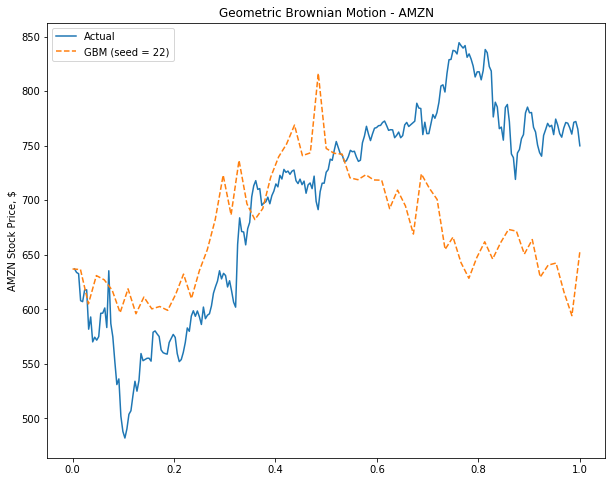

In [24]:
# adjusting the original time array from days to years
time = np.linspace(1, len(adj_close), len(adj_close))
time = [i/252. for i in time]
print(len(time))
print(len(t))
plt.plot(time, adj_close, label = 'Actual')
plt.plot(t, soln, label = 'GBM (seed = 22)', ls='--')

plt.ylabel('AMZN Stock Price, $')
plt.title('Geometric Brownian Motion - AMZN')

plt.legend(loc = 'upper left')

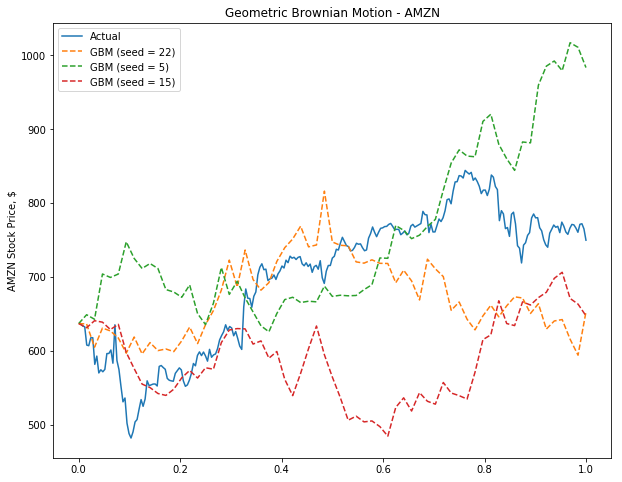

In [28]:
#We can also plot some other models with different random seeds to see how the path change
T = 1.
N = 2**6
So = adj_close[0]

seed = 5
W = Brownian(seed, N)[0]
soln2 = GBM(So, mu, sig, W, T, N)[0]    

seed = 15
W = Brownian(seed, N)[0]
soln3 = GBM(So, mu, sig, W, T, N)[0]    

# adjusting the original time array from days to years
time = np.linspace(1, len(adj_close), len(adj_close))
time = [i/252. for i in time]

plt.plot(time, adj_close, label = 'Actual')
plt.plot(t, soln, label = 'GBM (seed = 22)', ls = '--')
plt.plot(t, soln2, label = 'GBM (seed = 5)', ls = '--')
plt.plot(t, soln3, label = 'GBM (seed = 15)', ls = '--')

plt.ylabel('AMZN Stock Price, $')
plt.title('Geometric Brownian Motion - AMZN')

plt.legend(loc = 'upper left')


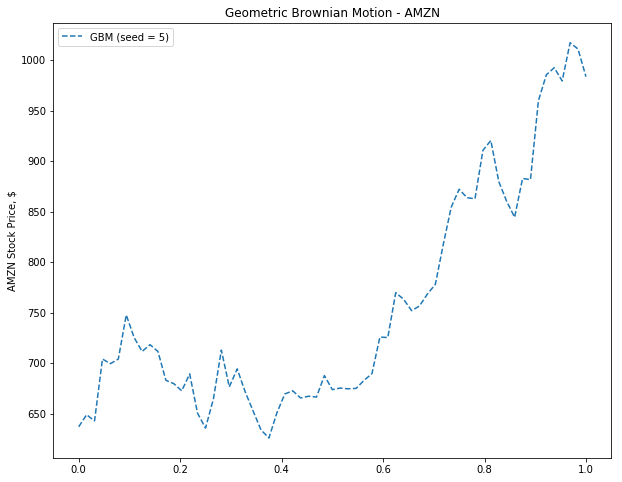

In [30]:
#Now that we have some working GBM models, we can build an Euler-Maruyama Model to approximate the path.

T = 1.
N = 2**6
So = adj_close[0]

seed = 5
W = Brownian(seed, N)[0]
soln2 = GBM(So, mu, sig, W, T, N)[0]    

plt.plot(t, soln2, label = 'GBM (seed = 5)', ls = '--')

plt.ylabel('AMZN Stock Price, $')
plt.title('Geometric Brownian Motion - AMZN')

plt.legend(loc = 'upper left')

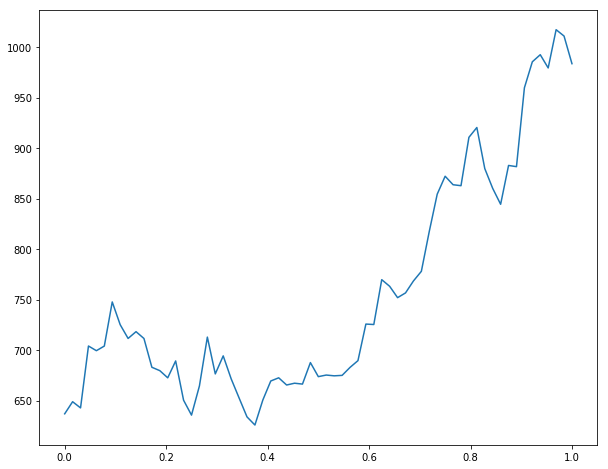

In [32]:
# Exact solution - GBM Model
seed = 5
So = adj_close[0]            # Initial AMZN stock price (01/01/2016)
W = Brownian(seed, N)[0]
T = 1.
N = 2**6

soln = GBM(So, mu, sig, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sig, W, T, N)[1]       # time increments for  plotting
plt.plot(t, soln, label ='GBM')

C:\Users\lmcleary\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\lmcleary\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


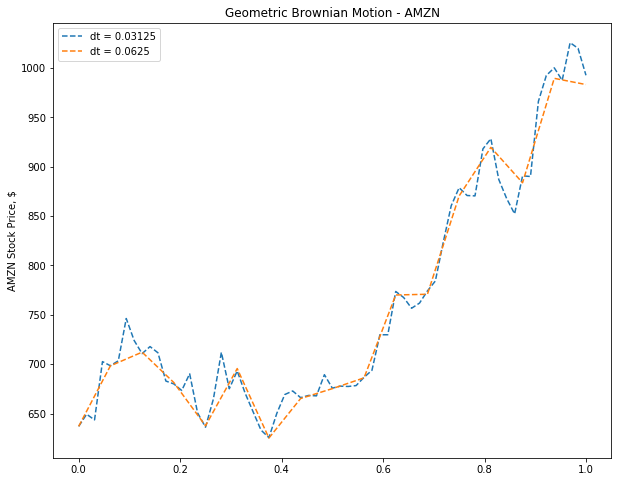

In [33]:
# Euler Maruyama Approximation
def EM(So, mu, sigma, b, T, N, M):
    dt = M * (1/N)  # EM step size
    L = N / M
    wi = [So]
    for i in range(0,int(L)):
        Winc = np.sum(b[(M*(i-1)+M):(M*i + M)])
        w_i_new = wi[i]+mu*wi[i]*dt+sigma*wi[i]*Winc
        wi.append(w_i_new)
    return wi, dt


# Changing the time step sizes
#
# dt = 0.03125
b = Brownian(5, N)[1]    # Brownian increments 
M = 1                    
L = N/M
EM_approx_1 = EM(So, mu, sig, b, T, N, M)[0]
time_EM_1 = np.linspace(0.,1.,L+1)

# dt = 0.0625
b = Brownian(5, N)[1]    # Brownian increments 
M = 4                    
L = N/M
EM_approx_2 = EM(So, mu, sig, b, T, N, M)[0]
time_EM_2 = np.linspace(0.,1.,L+1)


plt.plot(time_EM_1, EM_approx_1, label = 'dt = 0.03125', ls ='--')
plt.plot(time_EM_2, EM_approx_2, label = 'dt = 0.0625', ls ='--')


plt.ylabel('AMZN Stock Price, $')
plt.title('Geometric Brownian Motion - AMZN')

plt.legend(loc = 'upper left')

